## 1. Import libraries

Start by importing the necessry libraries such as pandas, numpy, matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the data

Load your dataset into pandas DataFrame.

In [2]:
df = pd.read_csv('Match_Results.csv')

## 3. Understand the data

Get quick overview of the dataset unsing methods like head(), info() and describe().

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47399 non-null  object
 1   home_team   47399 non-null  object
 2   away_team   47399 non-null  object
 3   home_score  47399 non-null  int64 
 4   away_score  47399 non-null  int64 
 5   tournament  47399 non-null  object
 6   city        47399 non-null  object
 7   country     47399 non-null  object
 8   neutral     47399 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [5]:
df.describe(include='all')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
count,47399,47399,47399,47399.000000,47399.000000,47399,47399,47399,47399
unique,16204,327,321,NaN,NaN,175,2064,270,2
top,2012-02-29,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False
freq,66,602,571,NaN,NaN,17995,725,1399,34892
mean,NaN,NaN,NaN,1.759784,1.182915,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.775093,1.401597,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN


## 4. Data cleanning

Handle missing values, remove duplicates and correct data types.

### Handle missing value

In [6]:
# Number of Null
num_null = df.isnull().sum().sum()

# Number of NaN
num_nan = df.isna().sum().sum()

print(f"Number of \'Null\' value(s) is {num_null} and number of \'NaN\' value(s) is {num_nan}")

Number of 'Null' value(s) is 0 and number of 'NaN' value(s) is 0


### Remove duplicate

We assumed that the same match (with same home_team and same away_team) can't be played more than one time at the same date.

In [7]:
# Number of duplicates values : simple
num_dup_simple = df.duplicated().sum()
print(f"Number of simple diplicated values : {num_dup_simple}\n")

# Number of duplicates values : subset
sub = ['date', 'home_team', 'away_team']
num_dup_subset = df.duplicated(subset = sub).sum()
print(f"Number of subset diplicated values : {num_dup_subset}\n")

# Number of duplicates values : refined
refined = ['date', 'home_team', 'away_team', 'home_score', 'away_score']
num_dup_refined = df.duplicated(subset = refined).sum()
print(f"Number of refined diplicated values : {num_dup_refined}\n")

Number of simple diplicated values : 0

Number of subset diplicated values : 20

Number of refined diplicated values : 17



We assumed that one match can only have one result, we will keep the result with 'subset'.

In [8]:
# Drop duplicated values : 'date', 'home_team', 'away_team'
# sub = ['date', 'home_team', 'away_team']
df.drop_duplicates(inplace=True, keep='last', subset=sub)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47379 non-null  object
 1   home_team   47379 non-null  object
 2   away_team   47379 non-null  object
 3   home_score  47379 non-null  int64 
 4   away_score  47379 non-null  int64 
 5   tournament  47379 non-null  object
 6   city        47379 non-null  object
 7   country     47379 non-null  object
 8   neutral     47379 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.3+ MB


### Correct columns types

In [10]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [11]:
# Set date type
df['date'] = pd.to_datetime(df['date'])

df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

## 5. Univariate analysis

Analyse individual variable using histograms, box plots and bar charts.

### 'date'

In [12]:
# Number of dates in the dataframe
num_date = df['date'].count()
print(f'Number of dates is : {num_date}')


Number of dates is : 47379


In [13]:
# Number of matches per date

num_match_dates = df['date'].value_counts().to_frame().reset_index()
num_match_dates.columns = ['date', 'number_matches_per_date']
num_match_dates.head()

,date,number_matches_per_date
0,2012-02-29,66
1,2016-03-29,64
2,2008-03-26,60
3,2014-03-05,59
4,2023-11-21,58


<b>Insight</b> : The greatest number of matchs were played <b>'2012-02-29'</b>, <b>66 matchs</b> 

In [14]:
# Number of matches per day

num_match_days = num_match_dates['number_matches_per_date'].value_counts().to_frame().reset_index()
num_match_days.columns = ['number_matches_per_day', 'effectifs']
num_match_days.head(15)

,number_matches_per_day,effectifs
0,1,7534
1,2,3910
2,3,1846
3,4,1070
4,5,488
5,6,292
6,7,178
7,8,111
8,9,89
9,10,67


<b>Insights</b> : The more frequent number of matches per day is <b>1</b>.

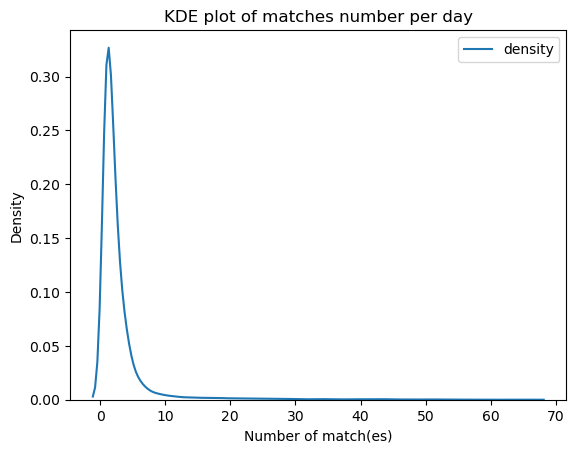

In [16]:
# Plot kde of number of matches per day 

sns.kdeplot(num_match_dates, label = 'density')
plt.title('KDE plot of matches number per day')
plt.xlabel('Number of match(es)')
plt.ylabel('Density')
plt.legend()
plt.show()

<b>Insight</b> : Most of the time, the number of matches played per day is less than <b>10</b>

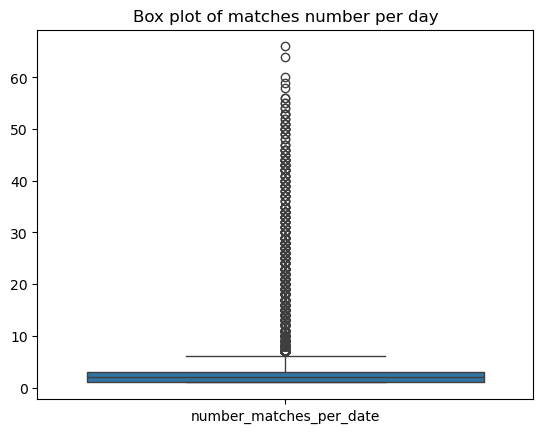

In [18]:
# Box plot of number of matches per day 

sns.boxplot(num_match_dates)
plt.title('Box plot of matches number per day')
plt.show()

<b>Insight</b> : The <b>Q3</b> of the number of matches played per day is less than <b>5</b>

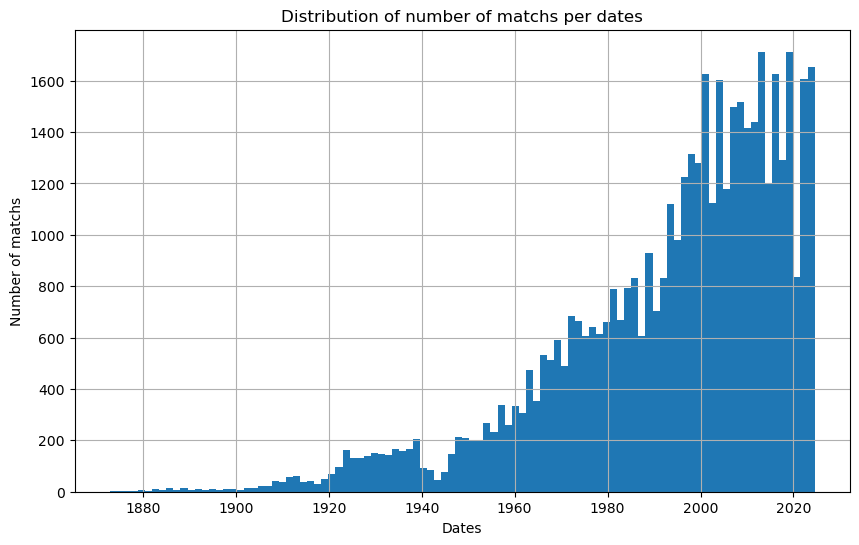

In [19]:
# Plot histogram of number of matchs per date

df['date'].hist(bins=100, figsize=(10,6))

plt.title('Distribution of number of matchs per dates')
plt.xlabel('Dates')
plt.ylabel('Number of matchs')
plt.show()

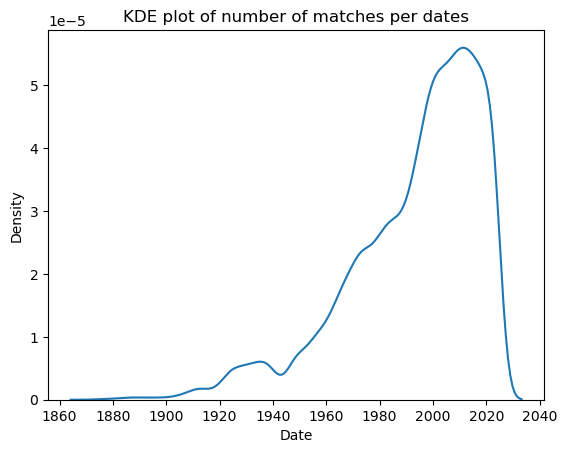

In [20]:
# Plot KDE
sns.kdeplot(df['date'])
plt.title('KDE plot of number of matches per dates')
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()

<b>Insight</b> : The majority of matches were played after <b>1980</b>.

### 'home_team'

In [21]:
# Number of teams that had played at home

unic_home_teams = df['home_team'].unique().tolist()
unic_home_teams.sort()
print(f"Number of home teams is : {len(unic_home_teams)}")

Number of home teams is : 327


In [22]:
# Number of matches played at home by teams
count_home_team = df['home_team'].value_counts().to_frame().reset_index()
count_home_team.columns = ['home_team', 'number_home_matches']
count_home_team.head()

,home_team,number_home_matches
0,Brazil,602
1,Argentina,592
2,Mexico,580
3,South Korea,543
4,Germany,542


<b>Insight</b> : The team that had most played at home is <b>Brazil</b>.

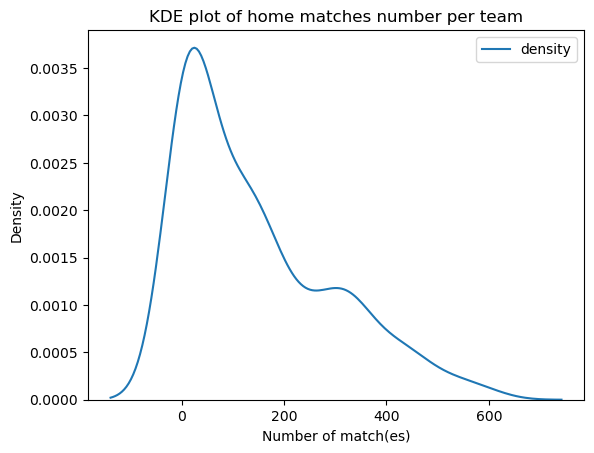

In [23]:
# Plot kde of number of home matches per team

sns.kdeplot(count_home_team, label = 'density')
plt.title('KDE plot of home matches number per team')
plt.xlabel('Number of match(es)')
plt.ylabel('Density')
# plt.xlim(0,)
plt.legend()
plt.show()

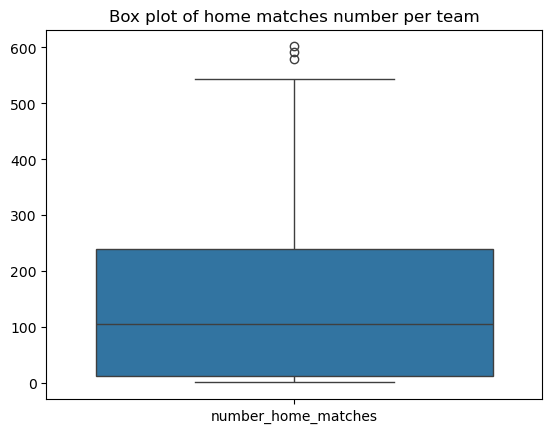

In [24]:
# Box plot of number of home matches per day 

sns.boxplot(count_home_team)
plt.title('Box plot of home matches number per team')
plt.show()

<b>Insight</b> : More than <b>75%</b> of teams have played fewer than <b>300</b> home matches with many outliers

### 'away_team'

In [25]:
# Number of teams that have played away

unic_away_teams = df['away_team'].unique().tolist()
unic_away_teams.sort()
print(f"Number of home teams is : {len(unic_away_teams)}")

Number of home teams is : 321


In [26]:
# Number of matches played away by teams
count_away_team = df['away_team'].value_counts().to_frame().reset_index()
count_away_team.columns = ['away_team', 'number_away_matches']
count_away_team.head()

,away_team,number_away_matches
0,Uruguay,571
1,Sweden,554
2,England,533
3,Hungary,499
4,Paraguay,483


<b>Insight</b> : The team that had most played at home is <b>Uruguay</b>.

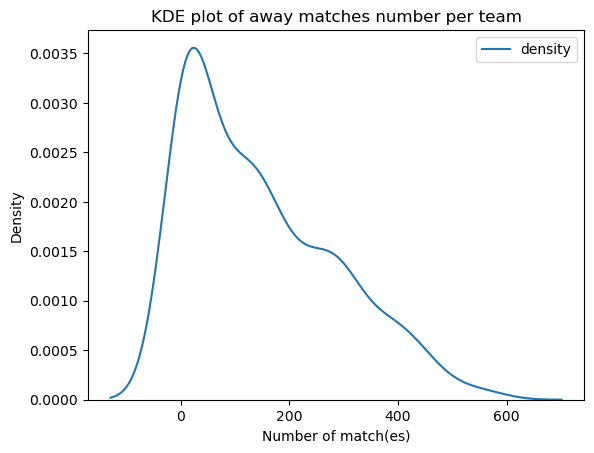

In [27]:
# Plot kde of number of away matches per team

sns.kdeplot(count_away_team, label = 'density')
plt.title('KDE plot of away matches number per team')
plt.xlabel('Number of match(es)')
plt.ylabel('Density')
plt.legend()
plt.show()

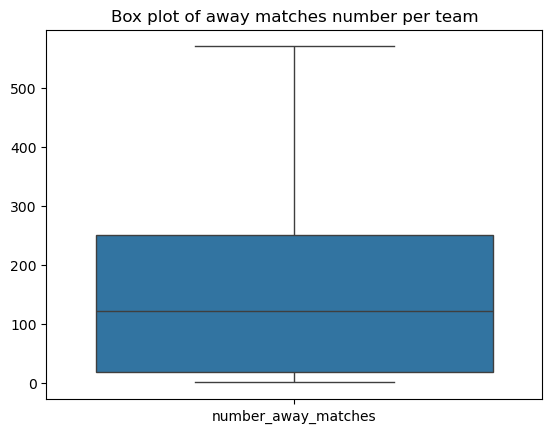

In [28]:
# Box plot of number of home matches per day 

sns.boxplot(count_away_team)
plt.title('Box plot of away matches number per team')
plt.show()

<b>Insight</b> : More than <b>75%</b> of teams have played fewer than <b>300</b> home matches with no outliers

### 'home_score'

In [29]:
# Mean and max home score
mean_home_score = df['home_score'].mean()
print(f"The mean home score is {mean_home_score} and the max is {df['home_score'].max()}")

The mean home score is 1.7593026446315878 and the max is 31


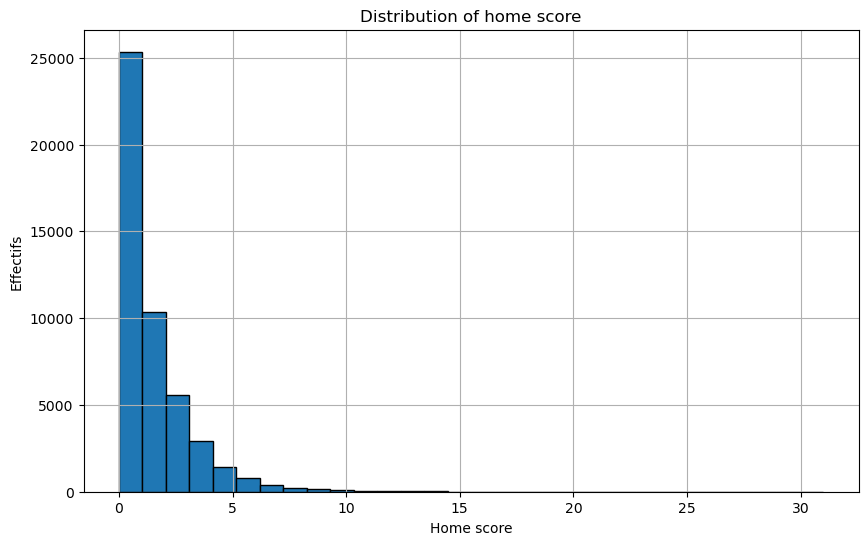

In [30]:
# Plot histogram of home score

df['home_score'].hist(bins=30, figsize=(10,6), edgecolor='black')

plt.title('Distribution of home score')
plt.xlabel('Home score')
plt.ylabel('Effectifs')
plt.show()

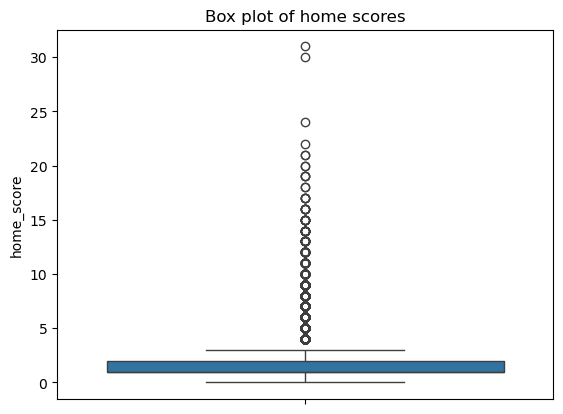

In [31]:
# Box plot of number of home matches per day 

sns.boxplot(df['home_score'])
plt.title('Box plot of home scores')
plt.show()

<b>Insight</b> : Most of the time, fewer than <b>5</b> goals are scored at home. With a maximum score greater than <b>30</b>.

### 'away_score'

In [32]:
# Mean and max away score
print(f"The mean home score is {df['away_score'].mean()} and the max is {df['away_score'].max()}")

The mean home score is 1.1826336562612128 and the max is 21


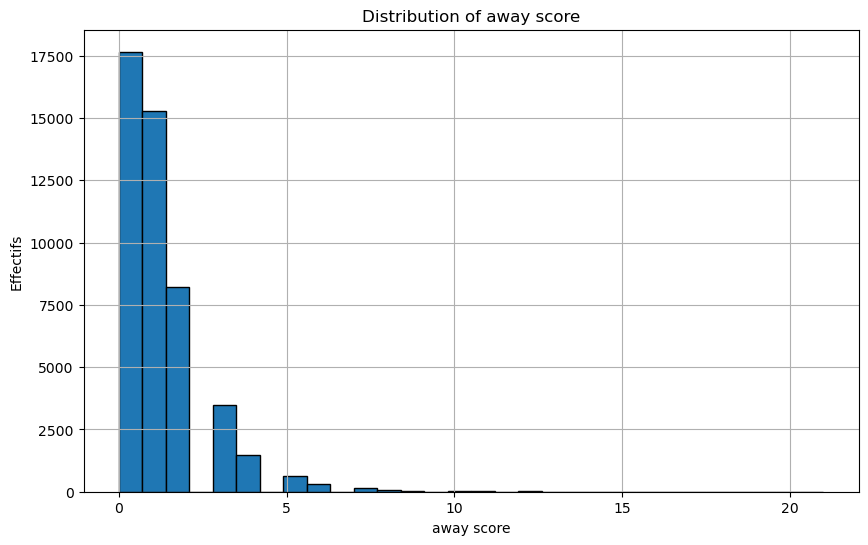

In [33]:
# Plot histogram of away score

df['away_score'].hist(bins=30, figsize=(10,6), edgecolor='black')

plt.title('Distribution of away score')
plt.xlabel('away score')
plt.ylabel('Effectifs')
plt.show()

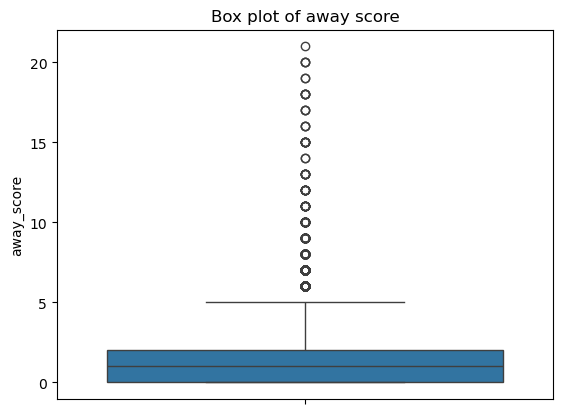

In [34]:
# Box plot of number of home matches per day 

sns.boxplot(df['away_score'])
plt.title('Box plot of away score')
plt.show()

<b>Insight</b> : Most of the time, fewer than <b>5</b> goals are scored away. With a maximum score greater than <b>20</b>.

### 'tournament'

In [35]:
tournament = df['tournament'].value_counts().to_frame().reset_index()
tournament.head(10)

,tournament,count
0,Friendly,17976
1,FIFA World Cup qualification,8169
2,UEFA Euro qualification,2824
3,African Cup of Nations qualification,2124
4,FIFA World Cup,964
5,Copa América,873
6,African Cup of Nations,793
7,AFC Asian Cup qualification,764
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


The total number of tournaments is : 175


<Axes: >

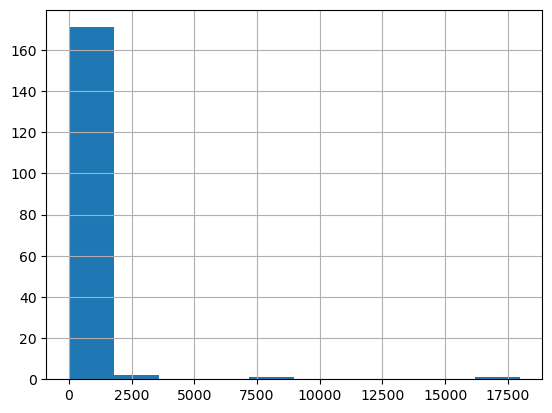

In [62]:
# Distribution of matches per tournaments
print(f"The total number of tournaments is : {tournament.shape[0]}")
tournament['count'].hist(bins=10)

### 'city'

In [37]:
df['city'].describe().to_frame()

,city
count,47379
unique,2064
top,Kuala Lumpur
freq,725


In [41]:
count_cities = df['city'].value_counts().to_frame().reset_index()
count_cities.head(10)

,city,count
0,Kuala Lumpur,725
1,Bangkok,571
2,Doha,546
3,London,427
4,Budapest,423
5,Montevideo,366
6,Kuwait City,361
7,Vienna,357
8,Oslo,348
9,Copenhagen,347


The total number of cities is : 2064


<Axes: >

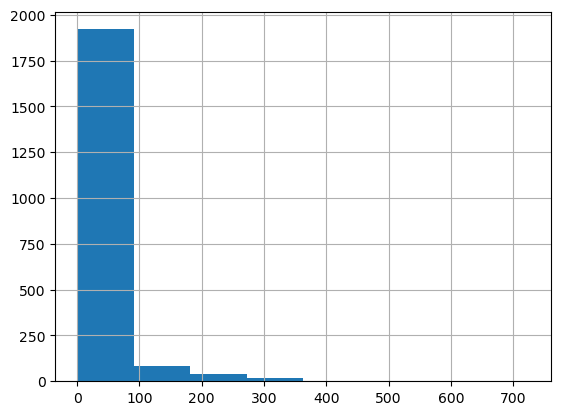

In [72]:
# Distribution of matches per cities
print(f"The total number of cities is : {count_cities.shape[0]}")
count_cities['count'].hist(bins=8)

### 'country'

In [73]:
df['country'].describe().to_frame()

,country
count,47379
unique,270
top,United States
freq,1399


In [101]:
count_country = df['country'].value_counts().to_frame().reset_index()
count_country.head(10)

,country,count
0,United States,1399
1,France,889
2,Malaysia,813
3,England,745
4,Qatar,701
5,Thailand,700
6,Germany,672
7,Sweden,668
8,United Arab Emirates,587
9,Spain,583


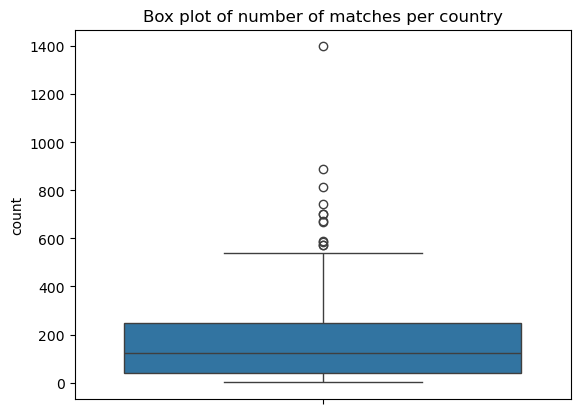

In [104]:
# count_country['count'].hist()
# Box plot of number of home matches per day 

sns.boxplot(count_country['count'])
plt.title('Box plot of number of matches per country')
plt.show()

### 'neutral'

In [79]:
df['neutral'].describe().to_frame()

,neutral
count,47379
unique,2
top,False
freq,34882


In [84]:
count_neutral = df['neutral'].value_counts().to_frame().reset_index()
count_neutral

,neutral,count
0,False,34882
1,True,12497


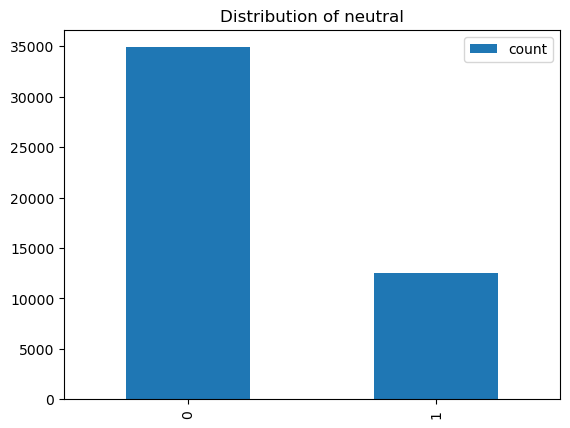

In [99]:
# Distribution of neutrals scores

count_neutral.plot(kind='bar')
plt.title('Distribution of neutral')
plt.show()

## 6. Bivariate analysis

Explore relationships between two variables using scatter plots, correlation matrices and pair plots.

In [105]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### 'home_team' & 'away_team'

In [135]:
# Number of matches between pairs of teams

home_away_teams = df[['home_team', 'away_team']]

home_away_teams['sorted_pair'] = df.apply(lambda row: tuple(sorted([row['home_team'], row['away_team']])), axis=1)

pair_teams = home_away_teams['sorted_pair'].value_counts().to_frame().reset_index()

pair_teams.head(7)

C:\Users\hp\AppData\Local\Temp\ipykernel_8788\1867815635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_away_teams['sorted_pair'] = df.apply(lambda row: tuple(sorted([row['home_team'], row['away_team']])), axis=1)


,sorted_pair,count
0,"(Argentina, Uruguay)",182
1,"(Austria, Hungary)",137
2,"(Belgium, Netherlands)",128
3,"(Guernsey, Jersey)",119
4,"(England, Scotland)",118
5,"(Kenya, Uganda)",110
6,"(Argentina, Brazil)",109


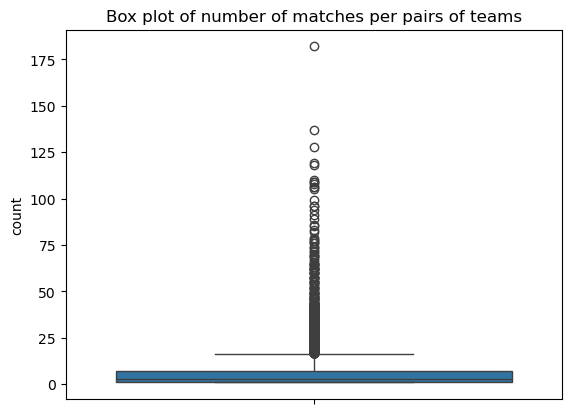

In [126]:
# pair_counts.hist()

sns.boxplot(pair_counts['count'])
plt.title('Box plot of number of matches per pairs of teams')
plt.show()

### 'home_score' & 'away_score'

In [143]:
home_away_scores = df[['home_score', 'away_score']]
home_away_scores['score_pairs'] = df.apply(lambda row: tuple((row['home_score'],row['away_score'])), axis=1)
pair_scores = home_away_scores['score_pairs'].value_counts()
# home_away_scores.head()
pair_scores.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_8788\3417654768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_away_scores['score_pairs'] = df.apply(lambda row: tuple((row['home_score'],row['away_score'])), axis=1)


score_pairs
(1, 0)    4886
(1, 1)    4717
(0, 0)    3797
(2, 0)    3671
(2, 1)    3637
(0, 1)    3299
(1, 2)    2454
(3, 0)    2260
(0, 2)    2141
(2, 2)    1862
Name: count, dtype: int64